##Import Library 

In [ ]:
 pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=a5ef7bbc46a3874097d70a7114e7f9852951bf7669e722b2082401249e39e546
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy


In [ ]:
from nsepy import get_history
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
from pandas.plotting import scatter_matrix
import seaborn as sns

##Getting the Data

In [ ]:
data1=get_history(symbol="HINDUNILVR", start=date(2022,3,1), end=date(2022,8,30))
data2=get_history(symbol="ITC", start=date(2022,3,1), end=date(2022,8,30))
data3=get_history(symbol="COLPAL", start=date(2022,3,1), end=date(2022,8,30))

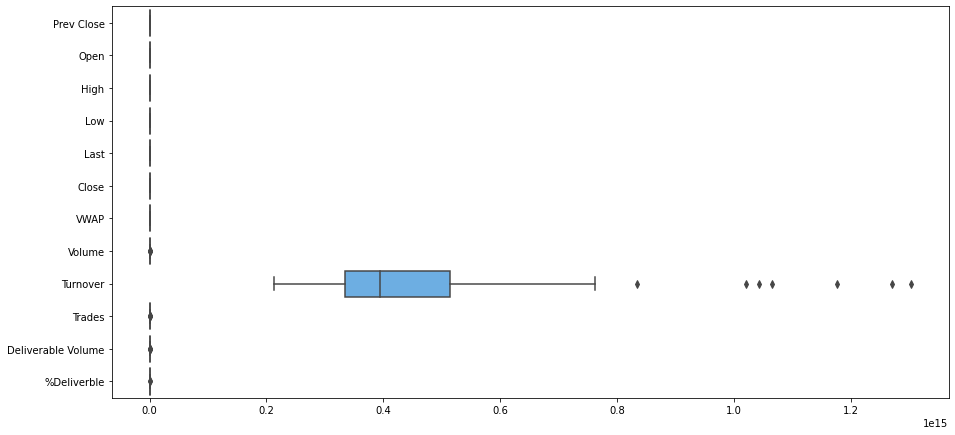

In [ ]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = data1.iloc[:, 0:14],orient='h')

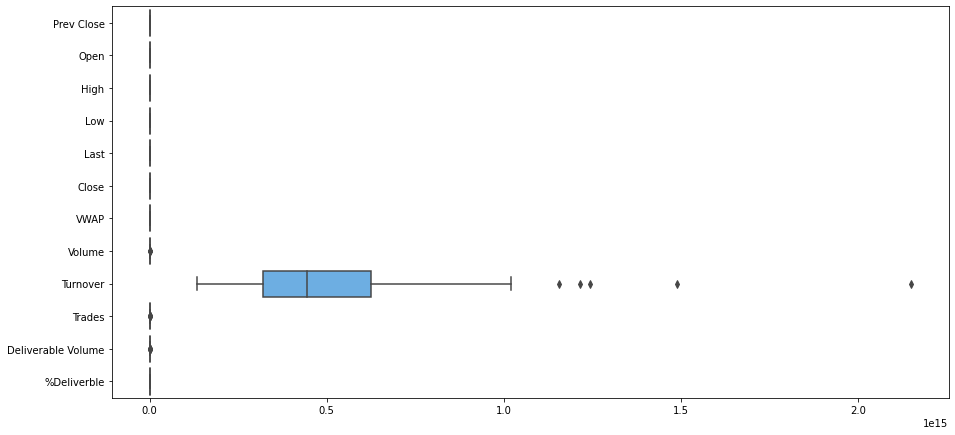

In [ ]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = data2.iloc[:, 0:14], orient = 'h')

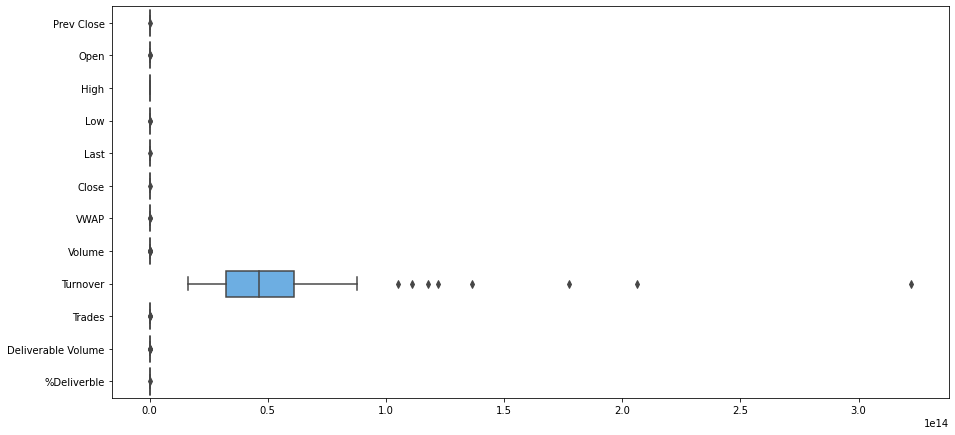

In [ ]:
# A quick check to find columns that contain outliers
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(data = data3.iloc[:, 0:14], orient = 'h')

# Combining the Data for analysis 
# Import cleaned csv file


In [ ]:
df=pd.read_csv("/content/Stock_Cleaned_Data_Final.csv")

In [ ]:
#checking the data 
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,02/03/22,HINDUNILVR,EQ,2172.10,2128.95,2154.80,2123.05,2150.0,2149.10,2137.12,2034688,4.348380e+14,155603.0,1360168.0,0.6685
1,03/03/22,HINDUNILVR,EQ,2149.10,2157.90,2167.95,2086.60,2090.0,2091.00,2112.31,2372998,5.012520e+14,167145.0,1564069.0,0.6591
2,04/03/22,HINDUNILVR,EQ,2091.00,2075.00,2077.95,1975.25,2020.0,2019.50,2009.04,6320118,1.269740e+15,332674.0,4523597.0,0.7157
3,07/03/22,HINDUNILVR,EQ,2019.50,1979.50,1980.15,1927.00,1944.0,1943.95,1951.43,2976453,5.808350e+14,218577.0,1913294.0,0.6428
4,08/03/22,HINDUNILVR,EQ,1943.95,1924.55,1958.00,1901.55,1955.0,1949.00,1926.80,3211938,6.188760e+14,183475.0,2082577.0,0.6484


In [ ]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
615,24/08/22,NIFTY FMCG,NaN,NaN,42847.55,43205.95,42768.05,NaN,42999.70,NaN,29234556,2.180890e+10,NaN,NaN,NaN
616,25/08/22,NIFTY FMCG,NaN,NaN,43189.40,43364.35,42738.65,NaN,42830.05,NaN,29429061,2.426340e+10,NaN,NaN,NaN
617,26/08/22,NIFTY FMCG,NaN,NaN,43103.95,43159.75,42698.95,NaN,42768.95,NaN,18316110,1.418540e+10,NaN,NaN,NaN
618,29/08/22,NIFTY FMCG,NaN,NaN,42286.55,43045.00,42226.55,NaN,42933.90,NaN,27340772,2.236750e+10,NaN,NaN,NaN
619,30/08/22,NIFTY FMCG,NaN,NaN,43106.55,43870.05,43100.45,NaN,43821.15,NaN,34274315,2.718160e+10,NaN,NaN,NaN


#EDA of the Cleaned Data


In [ ]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,372.000000,620.000000,620.000000,620.000000,372.000000,620.000000,372.000000,6.200000e+02,6.200000e+02,372.000000,3.720000e+02,372.000000
mean,1373.617608,11904.007984,11991.136048,11817.037500,1375.312903,11913.004597,1375.370860,7.041013e+07,2.059553e+14,88588.911290,3.983866e+06,0.551458
std,846.260615,14727.470293,14832.255396,14626.906671,847.404379,14741.653267,847.335325,1.199836e+08,2.816576e+14,65095.160726,6.068608e+06,0.092335
min,215.300000,214.400000,216.600000,212.450000,215.400000,215.300000,214.930000,1.039440e+05,1.167830e+10,8241.000000,2.963100e+04,0.160700
25%,293.925000,1517.375000,1532.287500,1502.187500,294.337500,1518.612500,293.920000,1.449298e+06,1.955928e+11,23782.500000,2.137985e+05,0.491475
50%,1563.150000,2233.050000,2258.600000,2206.475000,1562.175000,2234.150000,1562.330000,1.603064e+07,4.634410e+13,88994.500000,1.031671e+06,0.558250
75%,2142.812500,17314.925000,17382.650000,17181.712500,2141.100000,17328.987500,2142.277500,4.180588e+07,3.619430e+14,126518.500000,5.843072e+06,0.620275
max,2684.650000,43626.350000,43870.050000,43264.050000,2682.000000,43821.150000,2691.680000,6.516136e+08,2.148500e+15,455087.000000,4.082525e+07,0.789700


# Select Subset with relevant features

We use the daily closing price Close as the value to predict, so we can discard the other features.

'Close' column has numerical data type
The 'Date' is the index column and contains datetime values

In [ ]:
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

,Date,Close,Symbol
0,02/03/22,2149.10,HINDUNILVR
1,03/03/22,2091.00,HINDUNILVR
2,04/03/22,2019.50,HINDUNILVR
3,07/03/22,1943.95,HINDUNILVR
4,08/03/22,1949.00,HINDUNILVR


In [ ]:
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
#quick check of data
df_pivot.head()

Symbol,Date,COLPAL,HINDUNILVR,ITC,NIFTY,NIFTY FMCG
0,01/04/22,1549.60,2078.15,253.30,17670.45,36712.15
1,01/06/22,1623.85,2308.45,271.85,16522.75,38434.55
2,01/07/22,1515.40,2282.35,284.35,15752.05,38725.85
3,01/08/22,1575.05,2593.00,307.50,17340.05,42526.75
4,02/03/22,1447.50,2149.10,215.30,16605.95,35364.45


In [ ]:
df_pivot.tail()

Symbol,Date,COLPAL,HINDUNILVR,ITC,NIFTY,NIFTY FMCG
119,30/05/22,1608.85,2348.95,269.05,16661.40,38610.40
120,30/06/22,1486.85,2230.60,273.50,15780.25,37664.55
121,30/08/22,1674.95,2659.85,320.50,17759.30,43821.15
122,31/03/22,1542.25,2048.65,250.65,17464.75,36287.75
123,31/05/22,1627.20,2353.25,270.65,16584.55,38713.45


Evaluating the Correlation between the stocks.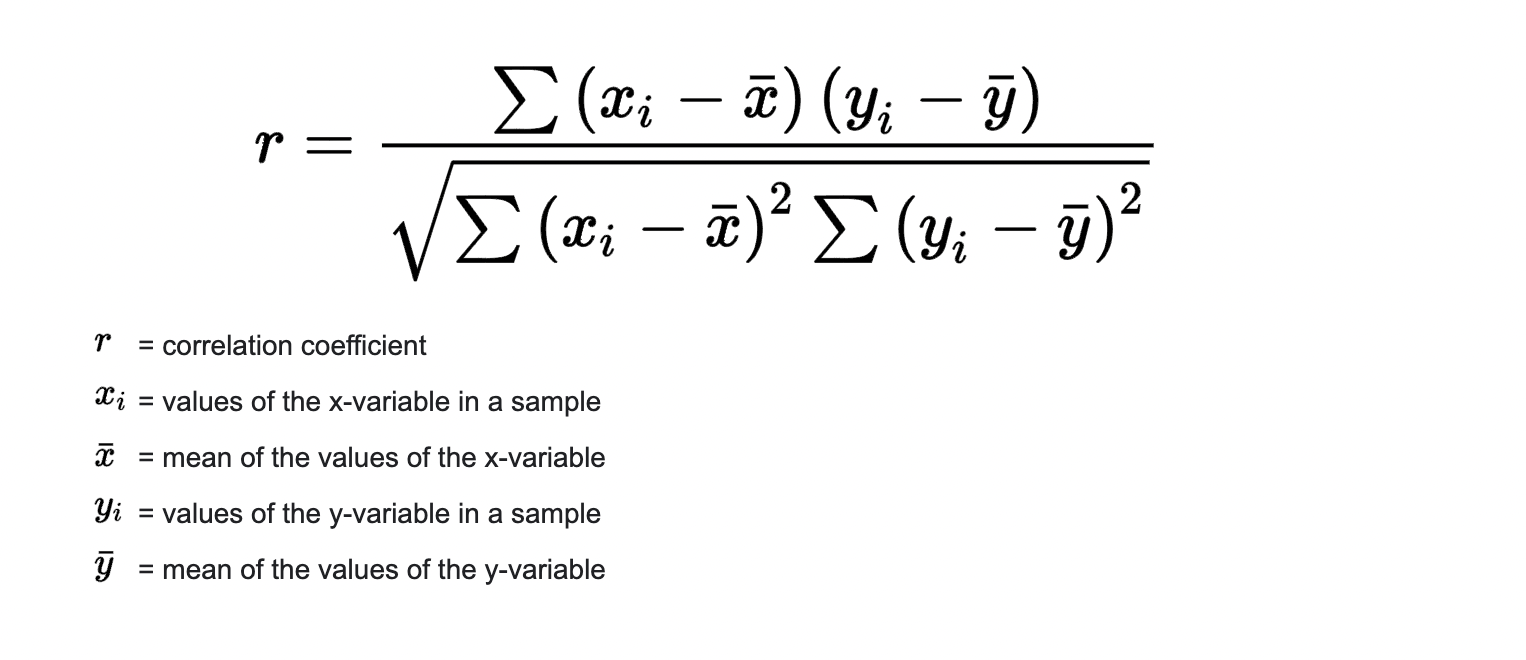

In [ ]:
corr_df = df_pivot.corr(method='pearson')
#reset 'Symbol' as index (rather than 0-X)
corr_df.head().reset_index()
#del corr_df.index.name
corr_df.head(10)

Symbol,COLPAL,HINDUNILVR,ITC,NIFTY,NIFTY FMCG
Symbol,,,,,
COLPAL,1.000000,0.477111,0.499930,0.390291,0.540413
HINDUNILVR,0.477111,1.000000,0.934518,0.185904,0.972860
ITC,0.499930,0.934518,1.000000,0.249824,0.966618
NIFTY,0.390291,0.185904,0.249824,1.000000,0.344836
NIFTY FMCG,0.540413,0.972860,0.966618,0.344836,1.000000


##Plotting the HeatMap

<Figure size 432x288 with 0 Axes>

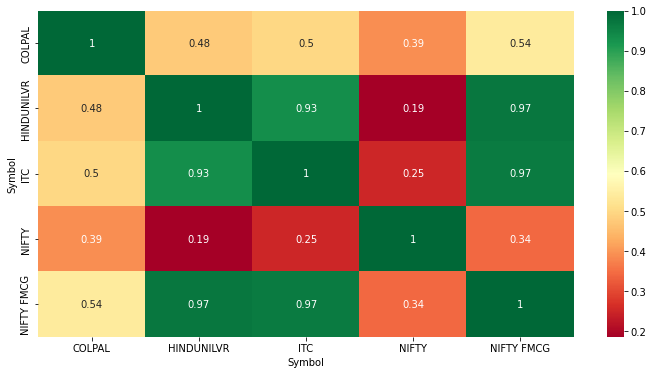

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

##Scatter Matrix


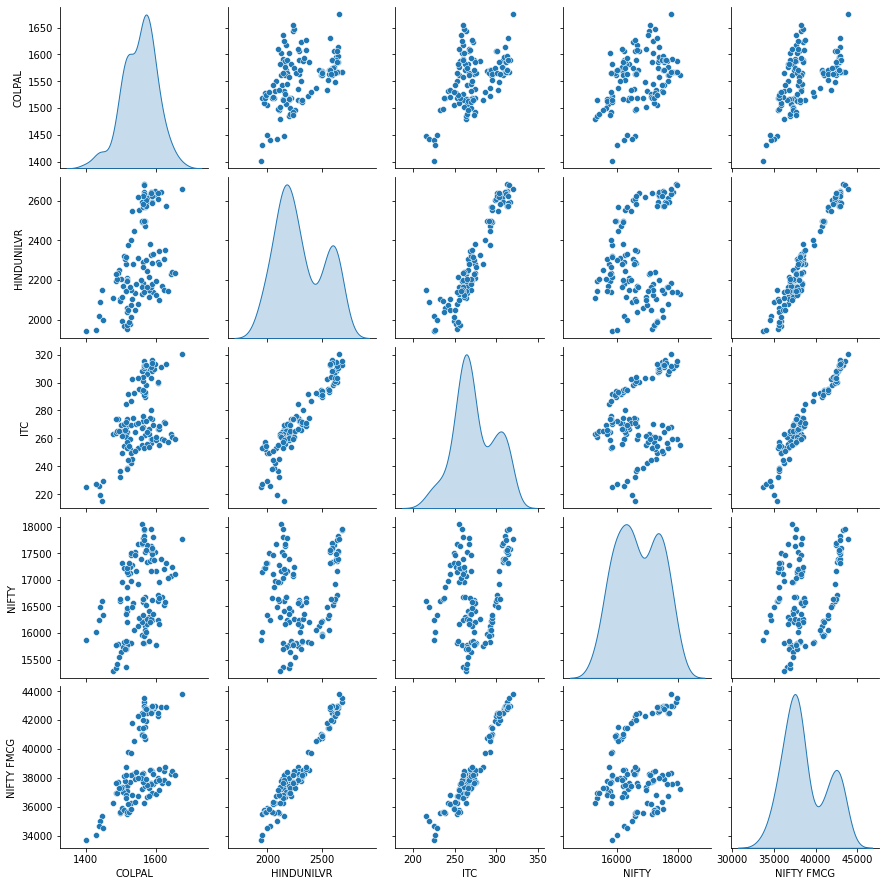

In [ ]:
sns.pairplot(df_pivot, diag_kind="kde")

Text(0.5, 1.0, 'HUL, ITC, COLPAL,  NIFTY and NIFTY FMCG')

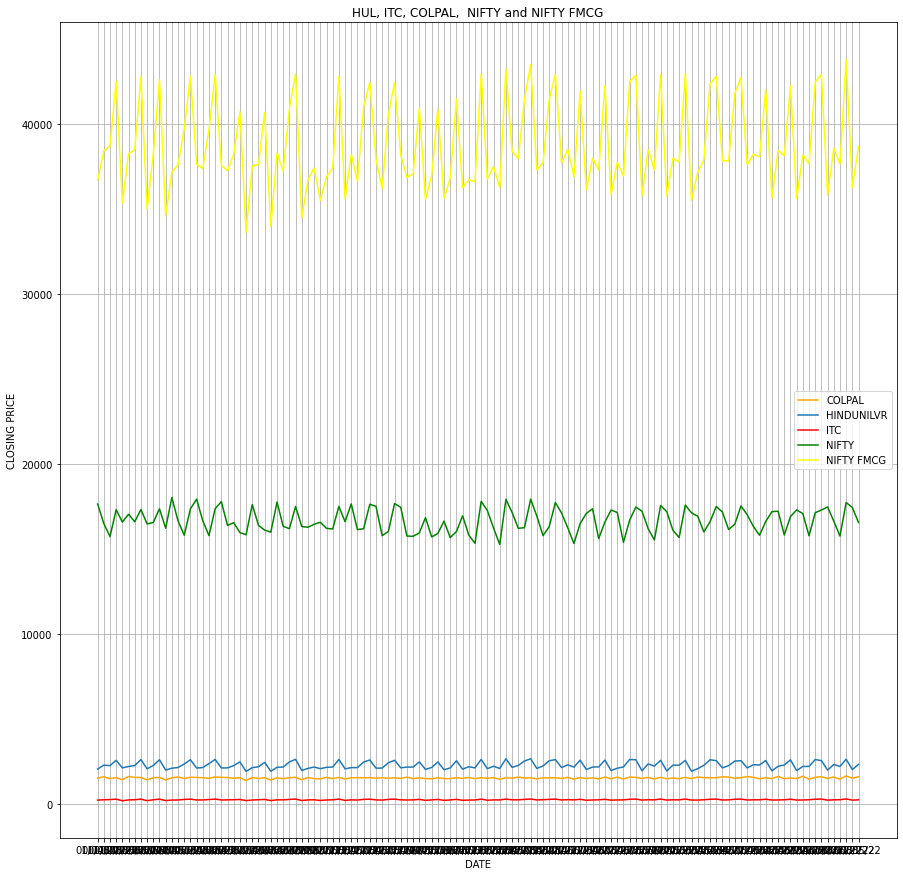

In [ ]:
from matplotlib import rcParams
plt.plot(df_pivot.Date, df_pivot.COLPAL, color = "ORANGE", label = "COLPAL")
plt.plot(df_pivot.Date, df_pivot.HINDUNILVR, label = "HINDUNILVR")
plt.plot(df_pivot.Date, df_pivot.ITC, color = "RED", label = "ITC")
plt.plot(df_pivot.Date, df_pivot.NIFTY, color = "GREEN", label = "NIFTY")
plt.plot(df_pivot.Date, df_pivot['NIFTY FMCG'], color='YELLOW', label= "NIFTY FMCG")
plt.xlabel("DATE")
plt.xticks(rotation=360)
plt.ylabel("CLOSING PRICE")
rcParams['figure.figsize'] = 12,8
plt.legend()
plt.grid("True")
plt.title("HUL, ITC, COLPAL,  NIFTY and NIFTY FMCG")